#**Week 1: Exploratory Data Analysis (EDA)**

Welcome to the first week's content! Let's jump straight into it. We'll first import the data.

In [ ]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://github.com/millenopan/DGMI-Project/blob/master/insurance.csv?raw=true'
data = pd.read_csv(url)

The data has now been imported for you here, where the CSV file is stored under the variable 'data'. Let's take a look at it.

In [ ]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Here, we see that we have a good amount of data for all our individuals. Let's break this down:

**Age**: age of primary beneficiary

**Sex**: insurance contractor gender (female, male)

**BMI**: Body Mass Index, this is the $\frac{mass}{height^2}$ of an individual, in units: $\frac{kg}{m^2}$

**Children**: Number of children or dependents covered by health insurance

**Smoker**: Whether they smoke or not (yes, no)

**Region**: the beneficiary's residential area in the US, (northeast, southeast, southwest, northwest)

**Charges**: Individual medical costs billed by health insurance (in USD)

-------------------------

And just to check if we have any N/A values:

In [ ]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

-------------

At this point, we can begin exploring more of the quantitative data, and try to see if we can get anything from our data provided.

In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Let's start by looking at the distribution of charges.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


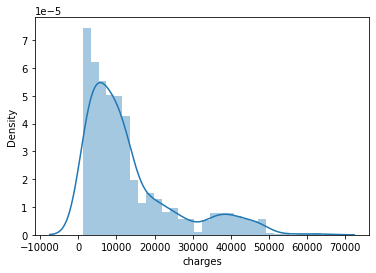

In [ ]:
sns.distplot(data['charges']);

Cool! We can already see at this point that some of the charges seem alot bigger than others. Let's try to see what might affect this. Below is the distribution plot for both smokers and non-smokers.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


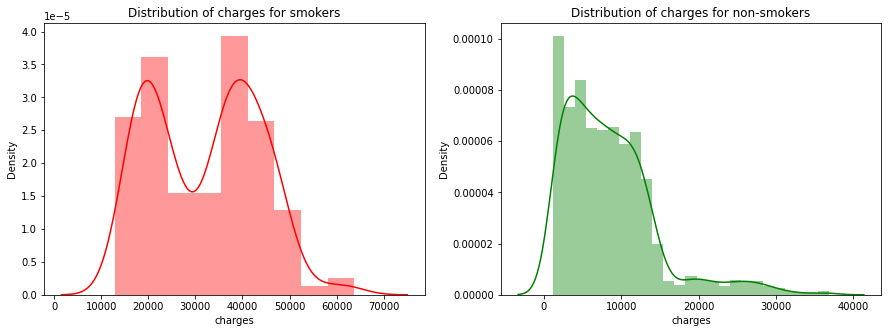

In [ ]:
f= plt.figure(figsize=(15,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker == 'yes')]["charges"],color='r',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == 'no')]['charges'],color='g',ax=ax)
ax.set_title('Distribution of charges for non-smokers');

Now, let's take a look at how many people represent either category. How many people in our dataset are smokers? How many are non-smokers?

In [ ]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

Our data does not contain too many samples who are actually smokers. Does gender affect this?

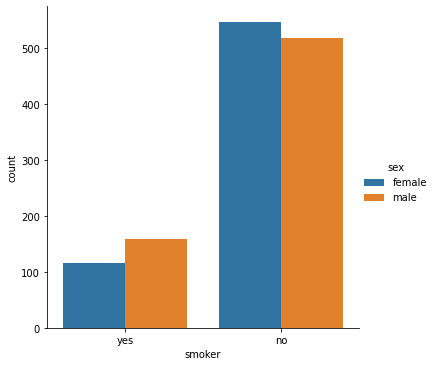

In [ ]:
sns.catplot(x="smoker", kind="count", hue = 'sex', data=data);

When we used .describe(), we were not able to get any info specifically on qualitiative nominal data, such as categorizing people as smokers or non-smokers. Here, we can group together and then observe how different each of these are in contrast. 

In [ ]:
group_smoker_data = data.groupby('smoker').mean()
group_smoker_data

,age,bmi,children,charges
smoker,,,,
no,39.385338,30.651795,1.090226,8434.268298
yes,38.514599,30.708449,1.113139,32050.231832


Finally, let's take a peek at how many people at a different age smoke in our sample.

In [ ]:
young_ppl = data[(data['age'] <= 20) & (data['age'] >= 18)]
# note that (data['age'] >= 18) was not actually neccesary since our data only surveyed adults;
# we can see this from data['age'].value_counts()
young_ratio = young_ppl['smoker'].value_counts(normalize=True)*100

print("Percentage of people aged 18-20 who do not smoke: " + str(round(young_ratio[0], 2)))
print("Percentage of people aged 18-20 who smoke: " + str(round(young_ratio[1], 2)) + '\n')

older_ppl = data[data['age'] >= 45]
older_ratio = older_ppl['smoker'].value_counts(normalize=True)*100

print("Percentage of people over the age of 45 who do not smoke: " + str(round(older_ratio[0], 2)))
print("Percentage of people over the age of 45 who smoke: " + str(round(older_ratio[1], 2)))

Percentage of people aged 18-20 who do not smoke: 76.51
Percentage of people aged 18-20 who smoke: 23.49

Percentage of people over the age of 45 who do not smoke: 81.66
Percentage of people over the age of 45 who smoke: 18.34
